In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [4]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [5]:
df1=df1.drop_duplicates(ignore_index=True)

In [6]:
train=df1[0:300]
test=df1[300:]

In [7]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [8]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor


In [11]:
dtm = DecisionTreeRegressor()


In [12]:
dtm.fit(X_train,y_train)

DecisionTreeRegressor()

In [13]:
dtm.score(X_train,y_train)

1.0

In [14]:
dtm.score(X_test,y_test)

0.5485364732368148

In [15]:
dtm.score(X_,y_)

-0.21473020090239925

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# Hyperparameter tuning

In [18]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [21]:
grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)


In [22]:
grid_cv_dtm.fit(X,y)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [23]:
grid_cv_dtm.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [24]:
dtm_1= DecisionTreeRegressor(criterion='mae',max_depth=6,max_leaf_nodes=20,min_samples_leaf=20,min_samples_split=20)


In [25]:
dtm_1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=20,
                      min_samples_leaf=20, min_samples_split=20)

In [26]:
dtm_1.score(X_train,y_train)

0.6970660064909147

In [27]:
dtm_1.score(X_test,y_test)

0.7172147691207111

In [28]:
dtm_1.score(X_,y_)

0.37076629015681106

In [30]:
y_pred_1=dtm_1.predict(X_)

In [32]:
from sklearn import metrics 

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 30666.80526570122
MAE: 24788.23170454545


In [33]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

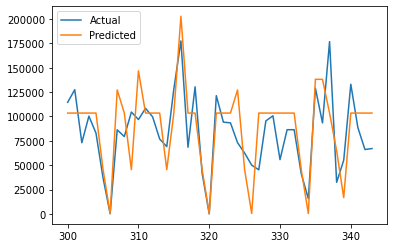

In [34]:
comp_1.plot()